# TV-Show Social Network Analysis
## Dataset
Each node rapresent the Facebook page of a TV-Show and the links indicate the common like that the two page shares.

Firslty we import the necessary library for calling external function

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

Create the graph, read the file and add edge and nodes 

In [2]:
graph = nx.Graph()
graph_edge_list=nx.Graph()

with open('fb-pages-tvshowEDGE.csv') as f:
    f.readline()
    for line in f:
        source, destination = line.strip().split(',') #tuple
        graph.add_edge(source,destination)
        
print('Number of nodes: {} - Number of links:{}'.format(graph.order(),graph.size()))

Number of nodes: 3892 - Number of links:17261


Read the nodes labels from file and relabel the graph nodes

In [3]:
labels = {}

df = pd.read_csv("fb-pages-tvshowNODES.csv")

df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

for index, row in df.iterrows():
    tmp = int(row["Id"])
    labels[str(tmp)] = str(row["name"])
    
graph = nx.relabel_nodes(graph, labels)

pos = nx.spring_layout(graph)

Run some statistics over the network

In [4]:
graph_degree=list(dict(graph.degree()).values())

print("Mean degree: "+ str(np.mean(graph_degree)))
print("Median degree: " + str(np.median(graph_degree))) 
print("Standard Deviation: "+ str(np.std(graph_degree)))
print("Max degree value: " + str(np.max(graph_degree)))
print("Min degree value: " + str(np.min(graph_degree)))

print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(graph)))

Mean degree: 8.932435930623868
Median degree: 5.0
Standard Deviation: 12.658862276836015
Max degree value: 126
Min degree value: 1
Assortativity coefficient: 0.5524458314376266


Expecially from the assortativity coefficient (if we normalise it) we see that the network is assortative.
Now we can run a first simple degree analysis by keep in mind that by degree we mean the sum of out-link and in-link of a node.

In [27]:
def getKey(label):
    keys = list(labels.keys())
    vals = list(labels.values())
    key = keys[vals.index(label)]
    return key

print("Modern Family has degree " + str(graph.degree["Modern Family"]))
print("The Office has degree " + str(graph.degree["The Office"]))
print("Hell's Kitchen has degree " + str(graph.degree["Hell's Kitchen"]))
print("The Big Bang Theory has degree " + str(graph.degree["The Big Bang Theory"]))
print("Friends has degree " + str(graph.degree["FRIENDS (TV Show)"]))
print("Kevin Can Wait has degree " + str(graph.degree["Kevin Can Wait"]))

Modern Family has degree 86
The Office has degree 45
Hell's Kitchen has degree 94
The Big Bang Theory has degree 36
Friends has degree 10
Kevin Can Wait has degree 4


For instance we can see that old tv-show like "Friends" has a low degree value, maybe because there is not too much tv-show that share the same success in the same period of time.
Moreover the tv-show "Kevin Can Wait", that after the first season the approval index has dropped drastically and fewer people continued to watch it during the second season, the degree value is even lower. So this can confirm that this series was not so good.

# Degree analysis
Now we can deeper analyise our network at the degree level.
First we need to define some constant.

In [6]:
max_element = 15

## Transitivity and clustering coefficient

In [7]:
print("Transitivity: " + str(nx.transitivity(graph)))
print('Average local clustering: ' + str(nx.average_clustering(graph)))

Transitivity: 0.5862432485779396
Average local clustering: 0.3743586545631158


In [8]:
# computing point statistics
local_clustering=nx.clustering(graph)
list_local_clustering=list(local_clustering.values())
print('Mean local clustering: {}'.format(np.mean(list_local_clustering)))
print('Standard deviation local clustering: {}'.format(np.std(list_local_clustering)))

Mean local clustering: 0.37435865456311496
Standard deviation local clustering: 0.35333763348098524


Now we can analyise the local cluster coefficient of some node.
In order to having a more informative result, we sort the result by the last node. We can see that the node with smallest local clustering coefficient is the tv-show "Kevin Can Wait", again this can be due to the motivation previous explained.

In [28]:
clustering = nx.clustering(graph)
cluster = sorted(clustering.items(), key=lambda x: x[1], reverse=False)

clust = []
name = []
dfc = pd.DataFrame()

count=0
for i in cluster:
    if count==max_element:
        break
    count=count+1
    name.append(i[0])
    clust.append(i[1])  

dfc["TV-show name"] = name
dfc["Local cluster coefficient"] = clust
dfc.style

,TV-show name,Local cluster coefficient
0,Kevin Can Wait,0
1,TVR,0
2,Duro de Domar,0
3,Adán y Eva,0
4,Outside the Lines,0
5,JTBC 뉴스룸 팩트체크,0
6,879,0
7,Life In Pieces,0
8,Mundo Cristiano,0
9,Poppy Cat,0


Now we can analyise, for every nodes, how many triangles it has. By triangle we mean a path of lenght 2, between 3 nodes, which start and end in the same node and include two other different node that are connected to the starting one and togheter as well.

In [10]:
triangle = nx.triangles(graph)
triangles = sorted(triangle.items(), key=lambda x: x[1], reverse=True)

t = []
name = []
dft = pd.DataFrame()

count=0
for i in triangles:
    if count==max_element:
        break
    count=count+1
    name.append(i[0])
    t.append(i[1])  

dft["TV-show name"] = name
dft["Number of Triangle"] = t
dft.style

,TV-show name,Number of Triangle
0,New Girl,2584
1,So You Think You Can Dance,2579
2,Bones,2555
3,Bob's Burgers,2517
4,Family Guy,2511
5,MasterChef,2509
6,The Simpsons,2502
7,Brooklyn Nine-Nine,2493
8,Glee,2480
9,Hell's Kitchen,2462


## Degree Centrality
This is based on the assumption that important nodes have many connections

In [11]:
centrality = nx.degree_centrality(graph)

sort_orders = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

degree_centr = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1], "-> Clustering:",clustering[i[0]],", Triangles:",triangle[i[0]])
    degree_centr.append(i[0])

Home & Family 0.03262558259968928 -> Clustering: 0.01892063492063492 , Triangles: 149
Queen of the South 0.03262558259968928 -> Clustering: 0.018412698412698412 , Triangles: 145
So You Think You Can Dance 0.027964785085447953 -> Clustering: 0.44634821737625474 , Triangles: 2579
MasterChef 0.027705851890212324 -> Clustering: 0.44242637982719096 , Triangles: 2509
Glee 0.026929052304505437 -> Clustering: 0.4630321135175504 , Triangles: 2480
New Girl 0.02641118591403418 -> Clustering: 0.5016501650165016 , Triangles: 2584
Family Guy 0.02615225271879855 -> Clustering: 0.4972277227722772 , Triangles: 2511
The Simpsons 0.02589331952356292 -> Clustering: 0.5054545454545455 , Triangles: 2502
Dancing with the Stars 0.02589331952356292 -> Clustering: 0.2808080808080808 , Triangles: 1390
Bones 0.025116519937856033 -> Clustering: 0.5487542955326461 , Triangles: 2555
Brooklyn Nine-Nine 0.02459865354738477 -> Clustering: 0.5583426651735722 , Triangles: 2493
Bob's Burgers 0.02459865354738477 -> Cluster

## Closeness Centrality
This is based on the assumption that important nodes are close to other nodes.

In [12]:
close_centrality = nx.closeness_centrality(graph) 

sort_orders = sorted(close_centrality.items(), key=lambda x: x[1], reverse=True)

close_centr = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1], "-> Clustering:",clustering[i[0]],", Triangles:",triangle[i[0]])
    close_centr.append(i[0])

Queen of the South 0.26575832645196806 -> Clustering: 0.018412698412698412 , Triangles: 145
Home & Family 0.2640864332603939 -> Clustering: 0.01892063492063492 , Triangles: 149
Access 0.2594383984952304 -> Clustering: 0.06610259122157588 , Triangles: 125
The Tonight Show Starring Jimmy Fallon 0.2537617451869374 -> Clustering: 0.1482153660012099 , Triangles: 245
The Voice 0.2489043567929879 -> Clustering: 0.21190130624092887 , Triangles: 292
The List 0.2461440407903123 -> Clustering: 0.0928030303030303 , Triangles: 49
America's Got Talent 0.2456274247917064 -> Clustering: 0.32469935245143383 , Triangles: 351
The Insider 0.2449575034885196 -> Clustering: 0.06507936507936508 , Triangles: 41
The Biggest Loser 0.24326026706979087 -> Clustering: 0.3031674208144796 , Triangles: 402
Entourage 0.242268364594442 -> Clustering: 0.13949579831932774 , Triangles: 83
Parenthood 0.24125437281359322 -> Clustering: 0.4954954954954955 , Triangles: 330
Jay Leno 0.24074304949507544 -> Clustering: 0.3853658

## Betweenness Centrality
It assumes that important nodes connect other nodes

In [13]:
bet_centrality = nx.betweenness_centrality(graph, normalized = True,  
                                              endpoints = False)

sort_orders = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)

between_centr = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1], "-> Clustering:",clustering[i[0]],", Triangles:",triangle[i[0]])
    between_centr.append(i[0])

Queen of the South 0.10742523465145855 -> Clustering: 0.018412698412698412 , Triangles: 145
Home & Family 0.0946836053254523 -> Clustering: 0.01892063492063492 , Triangles: 149
The Tonight Show Starring Jimmy Fallon 0.07709095896577413 -> Clustering: 0.1482153660012099 , Triangles: 245
The Voice Global 0.06959412801737738 -> Clustering: 0.024489795918367346 , Triangles: 30
Access 0.06535333827877769 -> Clustering: 0.06610259122157588 , Triangles: 125
The Voice 0.06169048036332727 -> Clustering: 0.21190130624092887 , Triangles: 292
MasterChef 0.04534207571579322 -> Clustering: 0.44242637982719096 , Triangles: 2509
American Idol 0.03899319150420554 -> Clustering: 0.3333333333333333 , Triangles: 287
Top Chef 0.03476590236949271 -> Clustering: 0.21794871794871795 , Triangles: 289
tagesschau 0.03457841379146478 -> Clustering: 0.1619718309859155 , Triangles: 414
The List 0.03336848873767014 -> Clustering: 0.0928030303030303 , Triangles: 49
Downton Abbey 0.031426416987036375 -> Clustering: 0.

## Page Rank
Page Rank Algorithm was developed by Google founders to measure the importance of webpages from the hyperlink network structure. Page Rank assigns a score of importance to each node. Important nodes are those with many inlinks from important pages.

In [14]:
pr = nx.pagerank(graph, alpha = 0.8)

sort_orders = sorted(pr.items(), key=lambda x: x[1], reverse=True)

page_rank = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1], "-> Clustering:",clustering[i[0]],", Triangles:",triangle[i[0]])
    page_rank.append(i[0])

Home & Family 0.0030029661331102894 -> Clustering: 0.01892063492063492 , Triangles: 149
Queen of the South 0.002976327435336093 -> Clustering: 0.018412698412698412 , Triangles: 145
The Voice Global 0.0026260675679972843 -> Clustering: 0.024489795918367346 , Triangles: 30
Les séries Canal+ 0.0016364634913707751 -> Clustering: 0.06896551724137931 , Triangles: 28
24 Oras 0.0015701246753894507 -> Clustering: 0.07096774193548387 , Triangles: 33
tagesschau 0.001542366876001499 -> Clustering: 0.1619718309859155 , Triangles: 414
CNN en Marcha 0.0013951782406360004 -> Clustering: 0.09090909090909091 , Triangles: 23
Access 0.0013662341583642746 -> Clustering: 0.06610259122157588 , Triangles: 125
The Walking Dead 0.0013340321332858847 -> Clustering: 0.06072874493927125 , Triangles: 45
Good Morning America 0.0013325563591362315 -> Clustering: 0.05735430157261795 , Triangles: 62
The Tonight Show Starring Jimmy Fallon 0.00132181040722322 -> Clustering: 0.1482153660012099 , Triangles: 245
Salut Bonjo

### Here we can see the different result jointly

In [15]:
df = pd.DataFrame()
df["Degree Centrality"] = degree_centr
df["Closeness Centrality"] = close_centr
df["Betweenness Centrality"] = between_centr
df["Page Rank"] = page_rank
df.style

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Page Rank
0,Home & Family,Queen of the South,Queen of the South,Home & Family
1,Queen of the South,Home & Family,Home & Family,Queen of the South
2,So You Think You Can Dance,Access,The Tonight Show Starring Jimmy Fallon,The Voice Global
3,MasterChef,The Tonight Show Starring Jimmy Fallon,The Voice Global,Les séries Canal+
4,Glee,The Voice,Access,24 Oras
5,New Girl,The List,The Voice,tagesschau
6,Family Guy,America's Got Talent,MasterChef,CNN en Marcha
7,The Simpsons,The Insider,American Idol,Access
8,Dancing with the Stars,The Biggest Loser,Top Chef,The Walking Dead
9,Bones,Entourage,tagesschau,Good Morning America


## Correlation between the different methods
The method corr(), exported by the library pandas, uses the Pearson's Correlation Test between the different column of our data frame.
We can see that, a part from the fact that the correlation matrix is specular by definition, there is not any particular strange result.

In [16]:
corr = pd.DataFrame()
corr["Page Rank"] = pr.values()
corr["Betweenness Centrality"] = bet_centrality.values()
corr["Closeness Centrality"] = close_centrality.values()
corr["Degree Centrality"] = centrality.values()
corr.corr()

,Page Rank,Betweenness Centrality,Closeness Centrality,Degree Centrality
Page Rank,1.000000,0.692174,0.367285,0.694467
Betweenness Centrality,0.692174,1.000000,0.320117,0.427801
Closeness Centrality,0.367285,0.320117,1.000000,0.540740
Degree Centrality,0.694467,0.427801,0.540740,1.000000


# Isolation and Connectivity

In [17]:
print(list(nx.isolates(graph)))

[]


In [18]:
print(nx.is_connected(graph))
print(nx.number_connected_components(graph))

True
1


So, we have no isolated component which mean that our graph is connected and it has only one (big) connected component 

# ECDF in linear e logscale
Here we analyse the degree distribution of our network and turns out that our graph is a scale-free network (like most of the real-world case) because it follow a power law degree distribution (heavy-tail distribution).

Text(0, 0.5, 'ECDF TV Show')

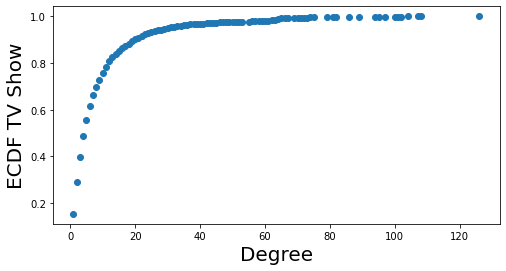

In [19]:
# ECDF linear scale
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF TV Show', size = 20)

Text(0, 0.5, 'ECDF TV Show')

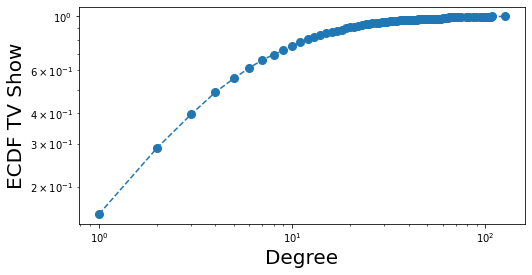

In [20]:
# ECDF loglog scale
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF TV Show', size = 20)

Text(0, 0.5, 'ECDF TV Show')

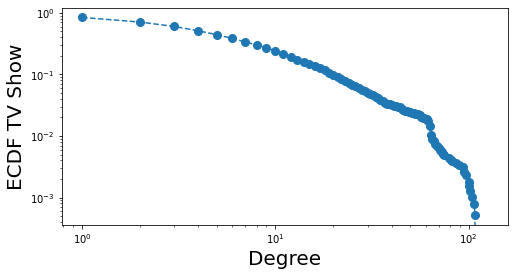

In [21]:
# ECCDF
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF TV Show', size = 20)

Now we can compare it with an Erdos-Renyi random network model to realize if the phenomenon carries information of if it is random.
First we calculate the densitiy for our starting network and we see that, as expected, is low.

In [22]:
density = nx.density(graph)
print('Density: {}'.format(density))

Density: 0.0023129041767539792


We use the density as parameter p of the Erdos-Renyi model, i.e. the probability that each pair of N labeled nodes is connected. The number of nodes of the two network must be equal and the number of links should be similiar.

In [23]:
p = density

random_graph = nx.fast_gnp_random_graph(graph.order(),p)

print('Number of nodes: {} - Number of links:{} -> TV-Show netowrk'.format(graph.order(),graph.size()))
print('Number of nodes: {} -> random network'.format(random_graph.order()))
print('Number of links: {} -> random network'.format(random_graph.size()))

random_degree = list(dict(random_graph.degree()).values())

Number of nodes: 3863 - Number of links:17253 -> TV-Show netowrk
Number of nodes: 3863 -> random network
Number of links: 17236 -> random network


Text(0, 0.5, 'ECCDF')

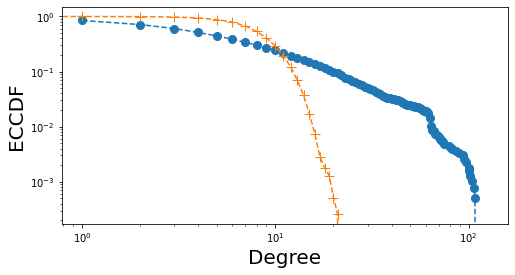

In [24]:
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

We can see that they behave in a similar manner

# Hubs
Since we saw that we are talking about a scale-free network we can also say if there exist some hubs, by deeper analyse the degree distribution.

In [25]:
percentile_99 = np.percentile(graph_degree,99)
print("99 percentile: ", percentile_99)

hub_nodi = [k for k,v in dict(graph.degree()).items() if v>= percentile_99]

print("Number of hubs: ",len(hub_nodi))

c = []
t = []
for i in hub_nodi:
    if i in clustering.keys():
        c.append(clustering[i])
    if i in triangle.keys():
        t.append(triangle[i])
        
dfh = pd.DataFrame()
dfh["Hub/Tv-show/node name"] = hub_nodi
dfh["Local clustering coefficient"] = c
dfh["Number of triangle"] = t
dfh.style

99 percentile:  65.0
Number of hubs:  40


,Hub/Tv-show/node name,Local clustering coefficient,Number of triangle
0,American Grit,0.940385,1956
1,Wayward Pines,0.690123,2236
2,MasterChef,0.442426,2509
3,The Grinder,0.929808,1934
4,FOX Teen Choice Awards,0.732877,1926
5,Rosewood,0.846121,1985
6,Scream Queens,0.927885,1930
7,New Girl,0.501650,2584
8,Gotham,0.829814,2004
9,Family Guy,0.497228,2511


From the table above we can see that neither the local clustering coefficient neither the number of triangles implies if a node will be an hub.

# Conclusion

From our degree analysis we see that different method (basing on different assumption) gives us different result.
From last analysis, the one about hubs, we can see that there are some - let's say - important node in our network and not all of them appear in our degree analysis (and vice versa).